In [2]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
###################
## Bayes vs True ##
###################

set_up = "LOG_n115000_d5_corr033_prcNA035_cent02_rep0"
exp = "ExpB"

bayes = load_data(set_up, data_type="bayes", exp=exp)
y_probs_bayes = bayes["y_probs_bayes"]

true = load_data(set_up, data_type="test", exp=exp)
y_probs_true = true["y_probs"]
M = true["M"]

idx = get_index_pattern(1, M)

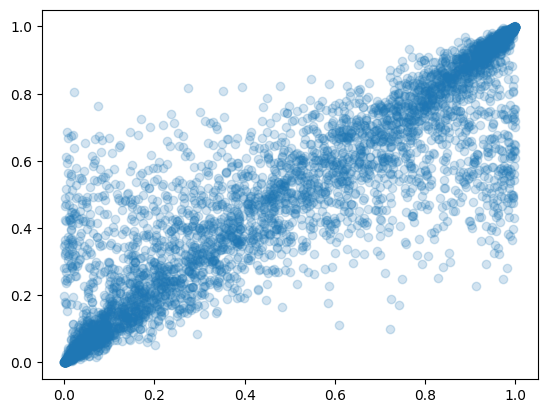

In [4]:
plt.scatter(y_probs_true[idx], y_probs_bayes[idx], alpha=0.2)
plt.show()

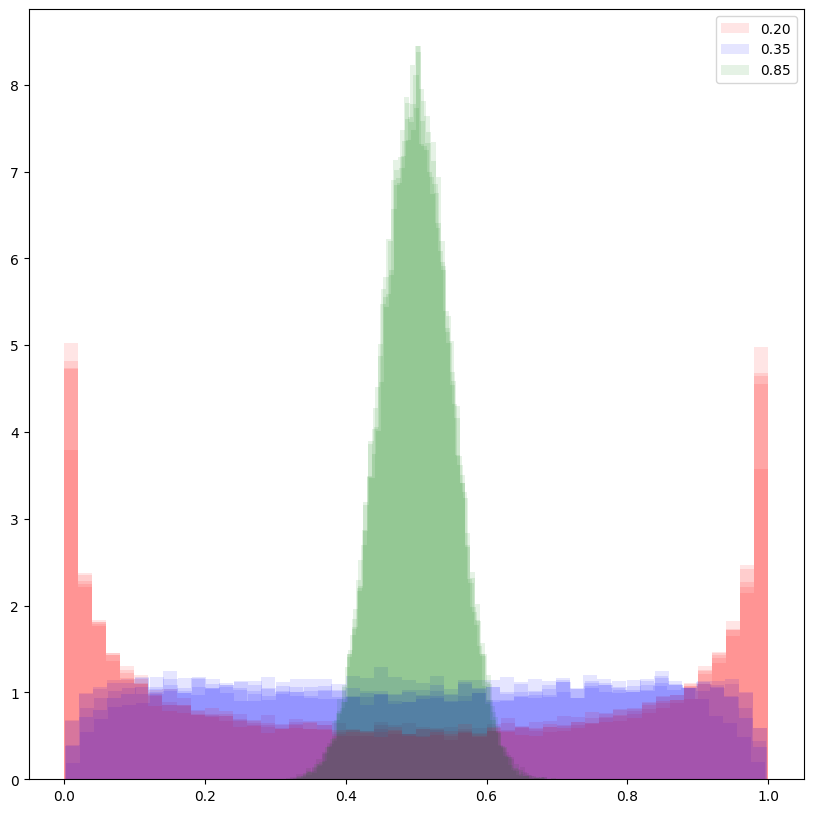

In [9]:
#################
## Distri of p ##
#################

plt.figure(figsize=(10, 10))

for r in range(5):
    set_up = f"LOG_n115000_d5_corr033_prcNA035_cent02_rep{r}"
    true = load_data(set_up, data_type="test", exp="ExpB")
    y_probs_true = true["y_probs"]

    set_upB = f"LOG_n115000_d5_corr033_prcNA035_cent035_rep{r}"
    expB = "ExpB"
    trueB = load_data(set_upB, data_type="test", exp=expB)
    y_probs_trueB = trueB["y_probs"]

    set_upC = f"LOG_n115000_d5_corr033_prcNA035_cent085_rep{r}"
    expC = "ExpB"
    trueC = load_data(set_upC, data_type="test", exp=expC)
    y_probs_trueC = trueC["y_probs"]

    if r == 0:
        plt.hist(y_probs_true, bins=50, alpha=0.1, label="0.20", density=True, color="red")
        plt.hist(y_probs_trueB, bins=50, alpha=0.1, label="0.35", density=True, color="blue")
        plt.hist(y_probs_trueC, bins=50, alpha=0.1, label="0.85", density=True, color="green")
    else:
        plt.hist(y_probs_true, bins=50, alpha=0.1, density=True, color="red")
        plt.hist(y_probs_trueB, bins=50, alpha=0.1, density=True, color="blue")
        plt.hist(y_probs_trueC, bins=50, alpha=0.1, density=True, color="green")
plt.legend()
plt.show()

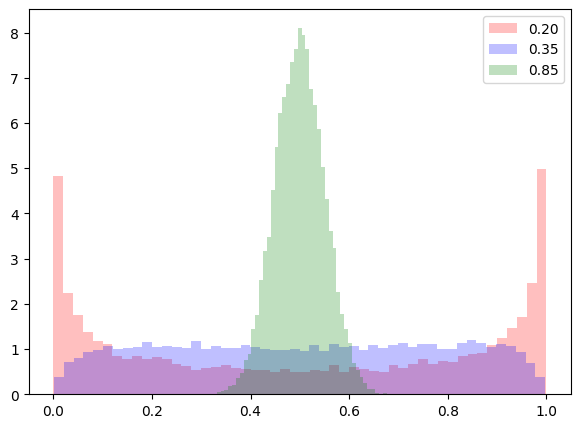

In [ ]:
#################
## Distri of p ##
#################

plt.figure(figsize=(7, 5))

all_y_probs_true = [[],[],[]]

for r in range(5):
    set_up = f"LOG_n115000_d5_corr033_prcNA035_cent02_rep{r}"
    true = load_data(set_up, data_type="test", exp="ExpB")
    y_probs_true = true["y_probs"]

    set_upB = f"LOG_n115000_d5_corr033_prcNA035_cent035_rep{r}"
    expB = "ExpB"
    trueB = load_data(set_upB, data_type="test", exp=expB)
    y_probs_trueB = trueB["y_probs"]

    set_upC = f"LOG_n115000_d5_corr033_prcNA035_cent085_rep{r}"
    expC = "ExpB"
    trueC = load_data(set_upC, data_type="test", exp=expC)
    y_probs_trueC = trueC["y_probs"]

    all_y_probs_true[0].extend(y_probs_true)
    all_y_probs_true[1].extend(y_probs_trueB)
    all_y_probs_true[2].extend(y_probs_trueC)

plt.hist(y_probs_true, bins=50, alpha=0.25, label="0.20", density=True, color="red")
plt.hist(y_probs_trueB, bins=50, alpha=0.25, label="0.35", density=True, color="blue")
plt.hist(y_probs_trueC, bins=50, alpha=0.25, label="0.85", density=True, color="green")

plt.legend()
# plt.savefig("data/ExpB/figures/hist_probs.pdf")
plt.show()

In [ ]:
# ##########################################
# # Recompute BAYES
# ##########################################

# import pandas as pd
# import os
# import numpy as np
# from utils import *

# Exp = "ExpA"

# set_ups = pd.read_csv(f"data/{Exp}/set_up.csv")

# for i in range(set_ups.shape[0]):
#     print(f"Processing {i+1}/{set_ups.shape[0]}")
#     set_up_name = set_ups.iloc[i, 5]
#     X_center = set_ups.loc[i, "center_X"]
#     cov = set_ups.loc[i, "corr"]

#     X_center = X_center[1:-1].split()
#     X_center = np.array([float(x) for x in X_center])

#     test_X = load_data(set_up_name, data_type="test", exp=Exp)["X_obs"]

#     true_beta = set_ups.loc[i, "true_beta"]
#     true_beta = true_beta[1:-1].split()
#     true_beta = np.array([float(x) for x in true_beta])

#     y_probs_bayes = get_y_prob_bayes(test_X, X_center, toep(5, cov), true_beta, n_mc=2500) 
#     y_probs_bayes = y_probs_bayes.mean(axis=1)

#     # save Y-probs_bayes
#     data_to_save_bayes = {
#         "y_probs_bayes": y_probs_bayes
#     }

#     np.savez(os.path.join("data", "ExpA", "bayes_data", f"{set_up_name}.npz"), **data_to_save_bayes)
    

Processing 1/36
Processing 2/36
Processing 3/36
Processing 4/36
Processing 5/36
Processing 6/36
Processing 7/36
Processing 8/36
Processing 9/36
Processing 10/36
Processing 11/36
Processing 12/36
Processing 13/36
Processing 14/36
Processing 15/36
Processing 16/36
Processing 17/36
Processing 18/36
Processing 19/36
Processing 20/36
Processing 21/36
Processing 22/36
Processing 23/36
Processing 24/36
Processing 25/36
Processing 26/36
Processing 27/36
Processing 28/36
Processing 29/36
Processing 30/36
Processing 31/36
Processing 32/36
Processing 33/36
Processing 34/36
Processing 35/36
Processing 36/36


In [29]:
# ##########################################
# # Recompute BAYES
# ##########################################

# import pandas as pd
# import os
# import numpy as np
# from utils import *

# Exp = "ExpA"

# set_ups = pd.read_csv(f"data/{Exp}/set_up.csv")

# for i in range(set_ups.shape[0]):
#     print(f"Processing {i+1}/{set_ups.shape[0]}")
#     set_up_name = set_ups.iloc[i, 5]
#     X_center = set_ups.loc[i, "center_X"]
#     cov = set_ups.loc[i, "corr"]

#     X_center = X_center[1:-1].split()
#     X_center = np.array([float(x) for x in X_center])

#     test_X = load_data(set_up_name, data_type="test", exp=Exp)["X_obs"]

#     true_beta = set_ups.loc[i, "true_beta"]
#     true_beta = true_beta[1:-1].split()
#     true_beta = np.array([float(x) for x in true_beta])

#     y_probs_bayes = get_y_prob_bayes(test_X, X_center, toep(5, cov), true_beta, n_mc=2500) 
#     y_probs_bayes = y_probs_bayes.mean(axis=1)

#     # save Y-probs_bayes
#     data_to_save_bayes = {
#         "y_probs_bayes": y_probs_bayes
#     }

#     np.savez(os.path.join("data", "ExpA", "bayes_data", f"{set_up_name}.npz"), **data_to_save_bayes)
    